In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None,sep=',')


In [146]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
var_names=['sepal length','sepal width','petal length','petal width','class']

In [148]:
data.columns=var_names

In [149]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
data.shape

(150, 5)

In [151]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [152]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [153]:
data.groupby('class',axis=0).size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

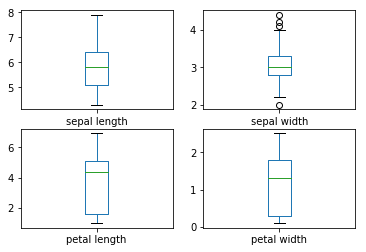

In [154]:
## Univariate analysis
data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,2))
plt.show()

From Boxplot we can figure out that there are presence ofoutlier in sepalwidth

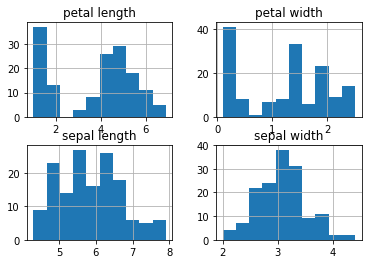

In [155]:
data.hist()
plt.show()
        

In [156]:
###Outlier detection
from scipy import stats
##d1=data[(np.abs(stats.zscore(data['sepal width'])) < 3).all(axis=0)]

In [157]:
d1=data.iloc[:,0:4] 
Q1 = d1.quantile(0.25) 
Q3 = d1.quantile(0.75) 
IQR = Q3 - Q1 
print(((d1 < (Q1 - 1.5 * IQR)) | (d1 > (Q3 + 1.5 * IQR))).sum())

sepal length    0
sepal width     4
petal length    0
petal width     0
dtype: int64


In [158]:
q = data['sepal width'].quantile(0.98)
p=data[data['sepal width']>q]
p

,sepal length,sepal width,petal length,petal width,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [160]:
##data_new=data.drop(data.index[[15,32,33]])
data_new=data
data_new.shape

(150, 5)

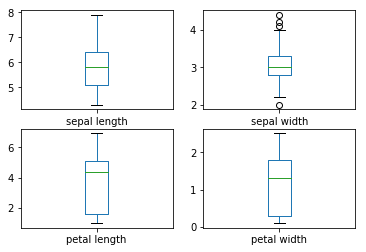

In [161]:
data_new.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,2))
plt.show()

REmove the outliers from the dataset


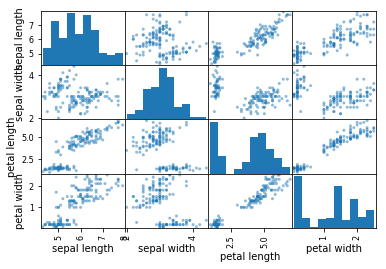

In [162]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)
plt.show()

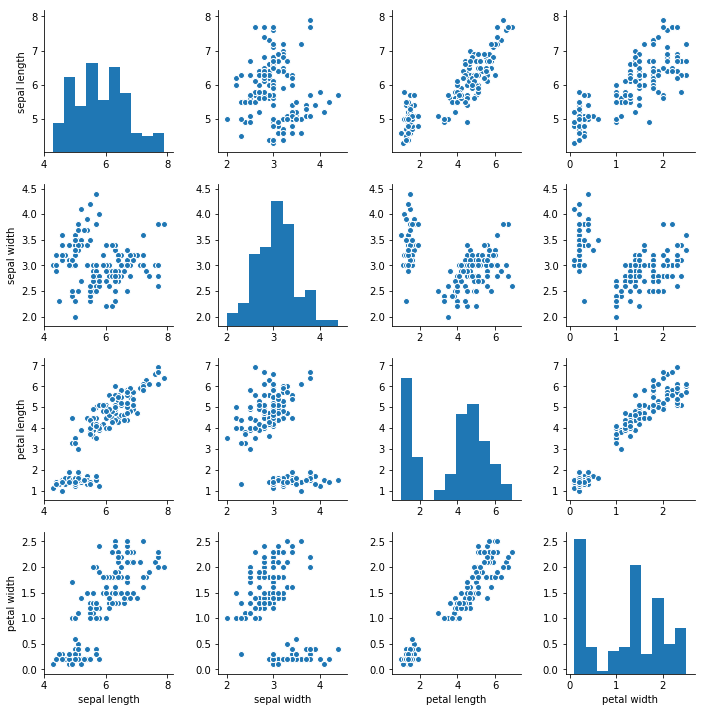

In [163]:
import seaborn as sns
%matplotlib inline
g=sns.pairplot(data_new)
plt.show()


In [164]:
data_new.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


Sepal length and petal length,sepal length petalwidth are highly co related,petal length and petal width also highly corelated
So we can remove the petallength for further analysis

In [165]:
data1=data_new.drop('petal length',axis=1)##Dropping petal length
data1.shape

(150, 4)

In [166]:
data1.head()

,sepal length,sepal width,petal width,class
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa


In [167]:
##Logistic regression
from sklearn.model_selection import train_test_split
y=data1['class']
x=data1.iloc[:,0:3]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12345)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=x_train, y=y_train)
y_pred=lr_model.predict(X=x_test)
y_pred
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.868421052632


In [168]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lr_model,x_train,y_train, cv=5)
print(scores_lr)
print(scores_lr.mean())

[ 0.83333333  0.95652174  0.95454545  0.90909091  0.80952381]
0.892603049125


In [169]:
##SVM
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X=x_train, y=y_train)
y_pred=lr_model.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
scores_svm=cross_val_score(clf,x_train,y_train, cv=5)
print(scores_svm)
print(scores_svm.mean())

0.868421052632
[ 1.          1.          0.90909091  0.95454545  0.9047619 ]
0.95367965368


In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [182]:
##Decission tree classifier
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_tree.fit(X=x_train,y=y_train)
print(model_tree.feature_importances_)
y_pred=model_tree.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
print(model_tree)
scores_dec=cross_val_score(model_tree,x_train,y_train, cv=5)
print(scores_dec)
print(scores_dec.mean())

[ 0.  0.  1.]
0.947368421053
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[ 1.          1.          0.90909091  0.90909091  0.9047619 ]
0.944588744589


In [184]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn_cls=KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(x_train,y_train)
y_pred=knn_cls.predict(X=x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))
scores_knn=cross_val_score(knn_cls,x_train,y_train, cv=5)
print(scores_knn)
print(scores_knn.mean())

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor']
0.894736842105
[ 1.          1.          0.86363636  0.95454545  1.        ]
0.963636363636


In [180]:
##LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred=lda.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
scores_lda=cross_val_score(lda,x_train,y_train, cv=5)
print(scores_lda)
print(scores_lda.mean())

0.947368421053
[ 1.          1.          0.90909091  0.95454545  0.9047619 ]
0.95367965368


In [176]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
scores_nb=cross_val_score(nb,x_train,y_train, cv=5)
print(scores_nb)
print(scores_nb.mean())

[ 0.95833333  1.          0.90909091  0.95454545  0.95238095]
0.95487012987


In [177]:
print(scores_lr.mean())
print(scores_svm.mean())
print(scores_knn.mean())
print(scores_lda.mean())
print(scores_dec.mean())
print(scores_nb.mean())

0.892603049125
0.95367965368
0.963636363636
0.95367965368
0.944588744589
0.95487012987
